<a href="https://colab.research.google.com/github/Mahal09/Python/blob/main/Project_2_Enews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Business Statistics: E-news Express**

## **Problem Statement**

E-news Express, an online news portal, is experiencing a decline in new monthly subscribers, potentially due to the limitations of its current landing page in engaging users effectively. To address this, the company has developed a redesigned landing page that incorporates an improved outline and more relevant content. The goal is to assess whether the new design increases user engagement and conversion rates compared to the existing design.

## **Objectives**

As a data scientist at E-news Express, We need to analyze the user interaction data from an A/B testing experiment conducted on the two landing page variants. The experiment aims to determine the effectiveness of the new design in increasing user engagement and conversions. Specifically, the objectives are:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

## **Data Dictionary**

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website
2. group - Whether the user belongs to the first group (control) or the second group (treatment)
3. landing_page - Whether the landing page is new or old
4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
5. converted - Whether the user gets converted to a subscriber of the news portal or not
6. language_preferred - Language chosen by the user to view the landing page

## **Solution Approach**

**Data Preparation:** Load and clean the data, ensuring variables are in the correct format and addressing any missing or outlier values.

**User Engagement Analysis:** Perform a one-tailed t-test to compare the average time spent on the new and old landing pages.

**Conversion Rate Comparison**: Conduct a proportion z-test to determine if the new landing page has a higher conversion rate than the old one.

**Language Impact on Conversion:** Use a chi-square test to analyze if conversion status is dependent on the preferred language.

**Time Analysis by Language:** Conduct a one-way ANOVA to check if time spent on the new page differs across language groups, and summarize actionable insights.

# **Import all the necessary libraries**

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 123.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 124.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 16.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0,

In [2]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.
# Function for handling normal distribution and statistical calculation
from scipy.stats import norm

# **Loading the dataset**

In [3]:
# Write your code here to read the data

df =pd.read_csv('/content/abtest.csv') #This is the code to read the contents of the .csv file in google colab.

Observations:

For the above line of code, I have directly uploaded by .csv file in the upload to session storage folder(same working directory).It is helpful to read the contents of the .csv file in google colab.

### **Displaying the first few rows of the dataset**

In [4]:
#Code here to view the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


Observations:

The head() in Python is used to display the first few rows of a DataFrame. By default, it shows the first 5 rows.

### **Displaying the last few rows of the dataset**

In [5]:
# Code to view the last 5 rows of the dataset
df.tail() # df.tail(5) => This also gives last 5 rows of dataset only.

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


### **Checking the shape of the dataset**

In [6]:
# view the shape of the dataset
df.shape

(100, 6)

Observations:
There are 100 rows and 6 columns.

### **Checking datatypes of different columns in dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


Observations:
1. The info() function in Pandas provides a concise summary of a DataFrame. It includes useful information such as: The number of rows and columns.
2. The names of the columns.The data type of each column,The number of non-null (non-missing) entries in each column.Memory usage of the DataFrame.


### **Getting the statistical summary for the variables**

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [9]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [10]:
df['time_spent_on_the_page'].describe()

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


In [11]:
df['converted'].describe()

,converted
count,100
unique,2
top,yes
freq,54


In [95]:
df['landing_page'].describe()

,landing_page
count,100
unique,2
top,old
freq,50


### **Check for missing values**

In [12]:
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


Obersvations:

There is no missing data in this dataset.
The use of df.isnull().sum() is to quickly check how much data is missing in each column. This is useful in data cleaning and preprocessing steps before analysis or modeling.

### **Check for duplicates**

In [13]:
duplicates = df[df.duplicated()].sum()
duplicates

,0
user_id,0.0
group,0.0
landing_page,0.0
time_spent_on_the_page,0.0
converted,0.0
language_preferred,0.0


Observations:

There is no duplicates observed in the dataset.

# **Exploratory Data Analysis**

## **Univariate Analysis**

In [14]:
df['language_preferred'].unique()

array(['Spanish', 'English', 'French'], dtype=object)

Observations:

There are 3 languages used Spanish,English and French.

In [87]:
df['landing_page'].value_counts()

,landing_page
old,50
new,50


Observations:

The landing page has 50 old and 50 new users.

In [86]:
df['converted'].value_counts()

,converted
yes,54
no,46


Observation:

The converted number of users were 54 and 46 of the users have not been converted yet.

In [15]:
df['user_id'].nunique()

100

Observations:

The total number of user id that are unique is 100.

<Axes: xlabel='group', ylabel='count'>

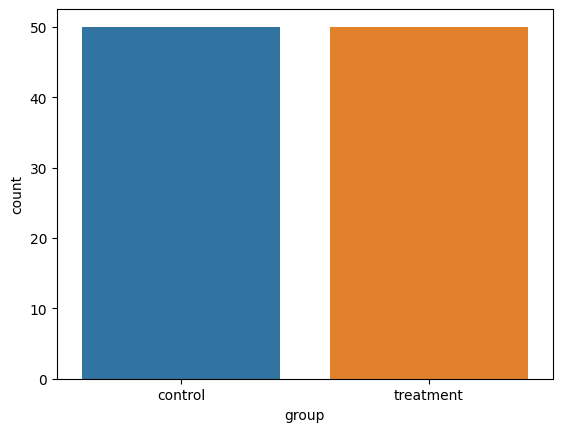

In [94]:
# Plotting the countplot for landing page
sns.countplot(data=df,x ='group',hue='group')

Observations:

The countplot shows an equal distribution of users across the old and new landing pages, indicating that the data is balanced between the two groups.

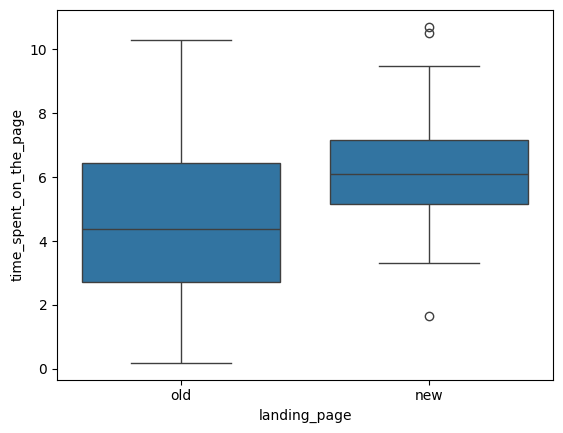

In [82]:
#Plotting the boxplot for Time_spent on the page and landing page.
sns.boxplot(data=df,y ='time_spent_on_the_page', x ='landing_page')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Observations:

The boxplot reveals that users tend to spend more time on the new landing page compared to the old landing page, with the new page showing a higher median time and possibly a wider distribution of engagement.
There seem to be a few outliers, particularly on the higher end for both the new and old landing pages, indicating that there are some users who spend significantly longer time on the landing pages than others.


<Axes: xlabel='language_preferred', ylabel='time_spent_on_the_page'>

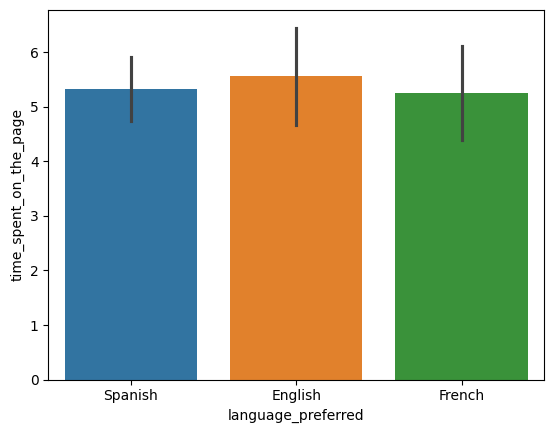

In [61]:
##Plotting the barplot for Time_spent on the page and language preferred
sns.barplot(data=df,x='language_preferred', y='time_spent_on_the_page',hue='language_preferred')

Observations:

The bar plot shows the average time spent on the page for each preferred language, highlighting variations in engagement across language groups.

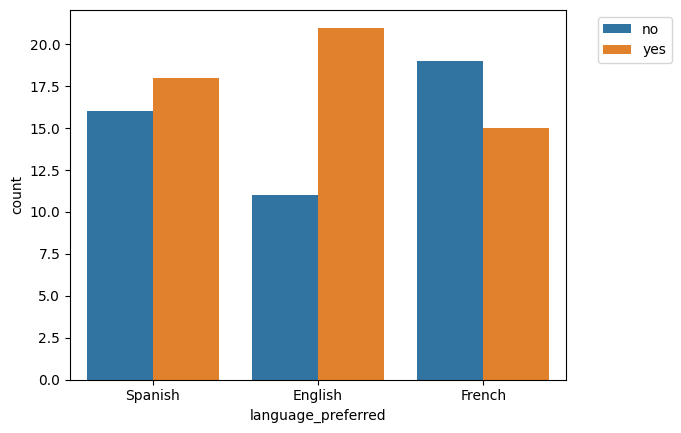

In [64]:
#The sns.countplot() visualization using the code you provided will create a bar plot to show the distribution of the language_preferred variable, with separate bars for each value of converted.

sns.countplot(data=df,x='language_preferred', hue='converted')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Observations:

The count plot shows the distribution of users' preferred languages and their conversion status, allowing for quick comparison of conversion rates across languages.

## **Bivariate Analysis**

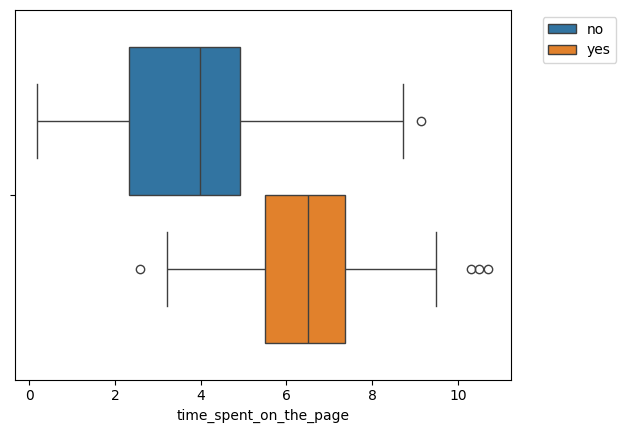

In [65]:
#Plotting the boxplot for Time_spent on the page and converted
sns.boxplot(data=df,x='time_spent_on_the_page', hue ='converted')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Observation:

The boxplot reveals differences in the time spent on the page between converted and non-converted users, with converted users typically spending more time.



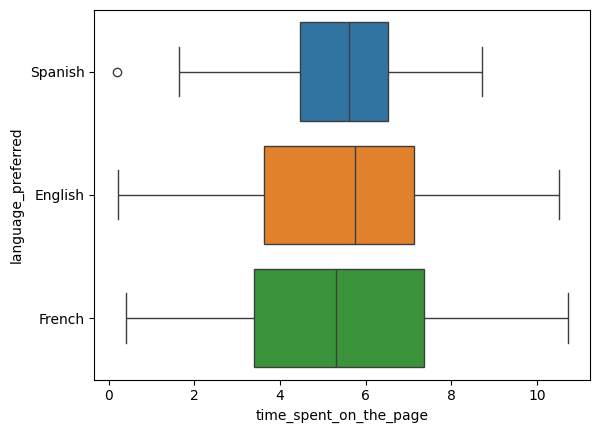

In [83]:
sns.boxplot(data=df,x ='time_spent_on_the_page',y ='language_preferred',hue='language_preferred')
plt.show()

# **1. Do the users spend more time on the new landing page than the existing landing page?**

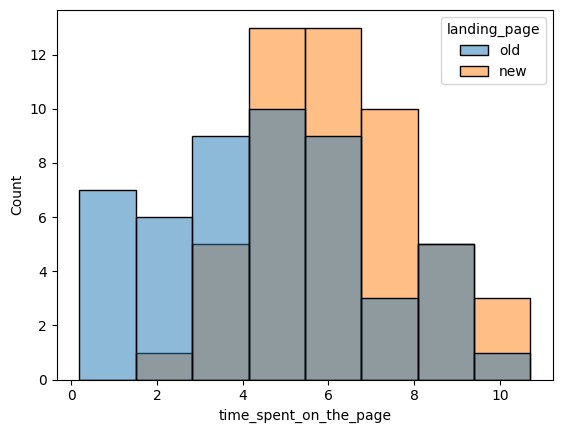

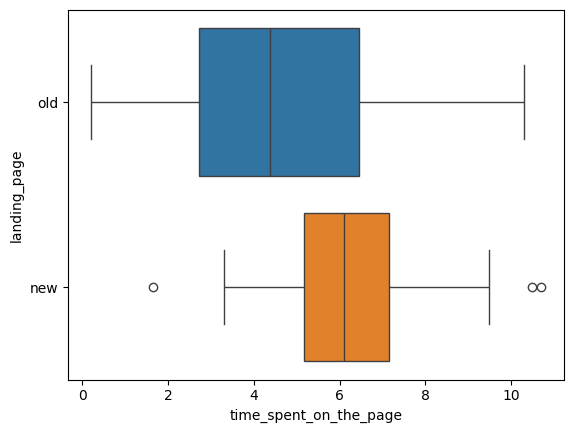

In [10]:
sns.histplot(data=df,x='time_spent_on_the_page',hue='landing_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page',y='landing_page',hue='landing_page')
plt.show()
#

Observation:

Yes, the user spend more time in new page than the old page. We can clearly see the difference in both the visuals and we even have the outliers also, meaning that the people tend to spend more time than the usual mean time.

# Step 1: Define the null and alternate hypotheses

Null hypothesis: H0 = Users spend equal time in old landing page and new landing page.

M1 = M2

Alternative hypothesis: Ha > Users spend more time in new landing time.

M1 > M2

# Step 2: Select Appropriate test

Based on the above information, This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown.

**It's 2 sample independent t-test**

# Step 3: Decide the significance level

To perform a statistical analysis at a significance level of 5% to determine the effectiveness of the new landing page in gathering new subscribers for the news portal

Significance level = 0.05

## Let's test whether the T-test assumptions are satisfied or not


Continuous data - Yes, the Time spent on the page is measured on a continuous scale.

Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.

Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.

Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.


Voila! We can use two sample T-test for this problem.

# Step 4: Collect and prepare data

In [13]:
# Prepare data for comparing time spent on new vs. existing landing pages
new_page_data = df[df['landing_page'] == 'new']['time_spent_on_the_page']
old_page_data = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [14]:
# You can further explore the data by calculating descriptive statistics:
print("New Page Time Spent (Mean):", new_page_data.mean())
print("Old Page Time Spent (Mean):", old_page_data.mean())
print("New Page Time Spent (Standard Deviation):", new_page_data.std())
print("Old Page Time Spent (Standard Deviation):", old_page_data.std())

New Page Time Spent (Mean): 6.2232
Old Page Time Spent (Mean): 4.532400000000001
New Page Time Spent (Standard Deviation): 1.8170310387878263
Old Page Time Spent (Standard Deviation): 2.581974849306046


Observation:

From the above calculation we can see the Standard deviation is different, And it furthur more proves the test assumptions to calculate 2 sample independent t-test.

# Step 5: Calculate the p-value

In [15]:
# The ttest_ind() function of Scipy will be used to compute the test statistic and p-value

t_statistic, p_value = stats.ttest_ind(new_page_data, old_page_data,equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)


The p-value is  0.0001392381225166549


Observation:

The p-value is 0.00013 which is much less than our significance level.

# Step 6: Compare the p-value with α

In [16]:
p_value = 0.0001392381225166549
α = 0.05

if p_value < α:
    print("Reject the null hypothesis. Users spend more time on the new landing page than the old landing page.")
else:
    print("Users spend equal time in old landing page and new landing page.")

Reject the null hypothesis. Users spend more time on the new landing page than the old landing page.


# Step 7: Draw inference

The t-test results show a statistically significant difference in time spent on the new and old landing pages (p-value < 0.05).

We reject the null hypothesis and conclude that users spend significantly more time on the new landing page than on the old landing page.

This suggests that the new landing page is more engaging and effective at capturing user attention.

# **2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**


# Perform Visual Analysis

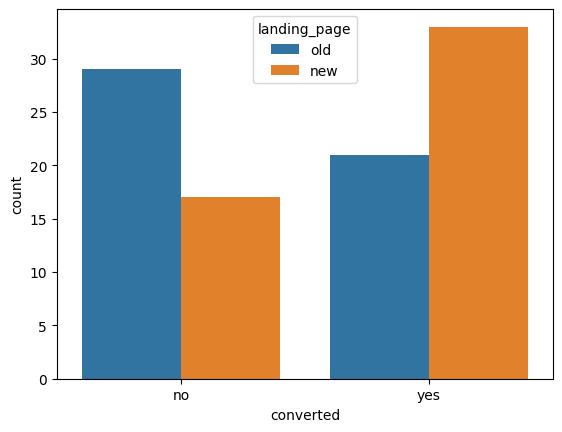

In [29]:
#plotting visual analysis using count plot for converted and landing_page

sns.countplot(data=df,x='converted',hue='landing_page')
plt.show()

<Axes: xlabel='converted', ylabel='landing_page'>

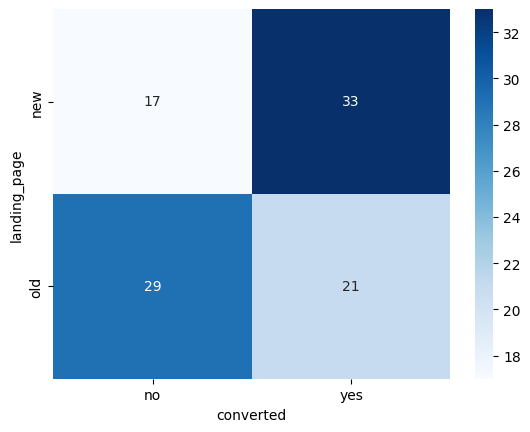

In [28]:
crosstab = pd.crosstab(df['landing_page'], df['converted'])

sns.heatmap(crosstab, annot=True, fmt="d", cmap="Blues")

# Step 1: Define the null and alternate hypotheses

Null hypotheses H0: The conversion rate of users of old landing page is equal to users been converted to the new page.

M1 = M2

Alternative Hypothesis Ha : The conversion rate of users of old landing page is greater than users been converted to the new page.

M1 > M2

# Step 2: Select Appropriate test

This test uses the same proportions_ztest() function as used in the one proportion z-test.

# Step 3: Decide the significance level

To perform a statistical analysis at a significance level of 5% to determine the effectiveness of the new landing page in gathering new subscribers for the news portal

Significance level = 0.05

# Step 4: Collect and prepare data

In [33]:
#  Collect and prepare data
new_page_conversions = df[(df['landing_page'] == 'new') & (df['converted'] == 'yes')].shape[0]
new_page_total = df[df['landing_page'] == 'new'].shape[0]
old_page_conversions = df[(df['landing_page'] == 'old') & (df['converted'] == 'yes')].shape[0]
old_page_total = df[df['landing_page'] == 'old'].shape[0]

# Calculate conversion rates
new_page_conversion_rate = new_page_conversions / new_page_total
old_page_conversion_rate = old_page_conversions / old_page_total

# Step 5: Calculate the p-value

In [34]:
#Calculate the p-value using a two-sample z-test for proportions

count = np.array([new_page_conversions, old_page_conversions])
nobs = np.array([new_page_total, old_page_total])

z_statistic, p_value = proportions_ztest(count, nobs, alternative='larger')

print("Z-statistic:", z_statistic)
print("P-value:", p_value)


Z-statistic: 2.4077170617153842
P-value: 0.008026308204056278


# Step 6: Compare the p-value with α

In [35]:
p_value = 0.008026308204056278
α = 0.05

if p_value < α:
    print("Reject the null hypothesis. The conversion rate for the new page is greater than the conversion rate for the old page.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the conversion rate for the new page is greater than the conversion rate for the old page.")

Reject the null hypothesis. The conversion rate for the new page is greater than the conversion rate for the old page.


# Step 7: Draw inference

The P-value of 0.008 is less than the significance level (typically 0.05), showing strong evidence against the null hypothesis.

Thus, We reject the null hypothesis and conclude that the conversion rate for the new page is statistically significantly greater than that for the old page.
